In [54]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from numpy import tan, sin, pi, cos
from mpl_toolkits.mplot3d import Axes3D


In [55]:
#Constants

M = 1
bh_r = 2*M


In [56]:
def geodesic(t, state):
    r, theta, phi, V1, V2, V3 = state
        
    dr  = V1
    dth = V2
    dph = V3
    dV1 = (-3*M*r**2*V1**2 + M*(2*M-r)**2 - r**3*(2*M-r)**2*(V3**2*sin(theta)**2 + V2**2))*(r**3*(2*M-r))**(-1)
    dV2 = 1/2*(-4*M*V1*V2 + r*(2*M-r)*V3**2*sin(2*theta) - 4*(2*M-r)*V1*V2)*(r*(2*M-r))**(-1)
    dV3 = 2*(-2*M*r*V2*tan(theta)**(-1) - 3*M*V1 + r**2*V2*tan(theta)**(-1) + r*V1) * V3 * (r*(2*M-r))**(-1)
     
    return [dr, dth, dph, dV1, dV2, dV3]

In [61]:
#[20, pi/2, 0, -0.1, 0.01 , 0]

y0 = [20, pi/2, 0, -0.1, 0 , 0.01]
t_span = (0.0, 10000.0)
p=(1)

result_solve_ivp = solve_ivp(geodesic, t_span, y0, rtol=1e-13, atol=1e-13, method='BDF')

In [62]:
r = result_solve_ivp.y[0]
theta = result_solve_ivp.y[1]
phi = result_solve_ivp.y[2]

In [63]:
x = r * sin(theta) * cos(phi)
y = r * sin(theta) * sin(phi)
z = r * cos(theta)

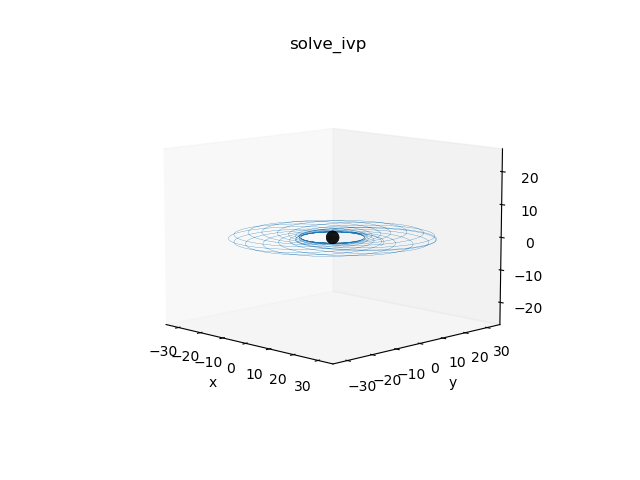

In [64]:
%matplotlib widget


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.cla()

bh_phi, bh_theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]
bh_x = bh_r * sin(bh_phi) * cos(bh_theta)
bh_y = bh_r * sin(bh_phi) * sin(bh_theta)
bh_z = bh_r * cos(bh_phi)

bh = ax.plot_surface(bh_x,bh_y,bh_z,color='k')

q,= ax.plot(x,
        y,
        z, linewidth=.2)

ax.set_title("solve_ivp")
plt.xlabel("x")
plt.ylabel("y")
ax.view_init(elev=10, azim=-45)
ax.set_aspect('equal')
ax.grid(False)


In [ ]:
from matplotlib.animation import Animation, FuncAnimation, writers
from IPython import display


frm = 150
scale = int(len(x)/frm)-1

spheres = np.empty(frm, dtype=object)

ax.set_title("Black Hole")
plt.xlabel("x")
plt.ylabel("y")

def animation_function(ii):
    if ii==0:
        return
    if ii>1:
        spheres[ii-1].set_visible(False)
    #plt.cla()
    #ax.view_init(elev=0, azim=90)
    spheres[ii], = ax.plot(x[scale*ii],
                    y[scale*ii],
                    z[scale*ii], 'bo')


    

    #plt.axis("off")

    # plt.show()


anim = FuncAnimation(fig, animation_function, frames=frm, repeat=False, interval=100)
# converting to an html5 video
video = anim.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(html)
